# obp>policy>base.py
각각의 policy들은 base.py의 추상화 클래스 중 하나를 상속받는다. 

## BaseContextFreePolicy 클래스    
파라미터
- n_actions 
- len_list
- batch_size
- random_state 

메소드 
- select_action() 
- update_params(action, reward)

상속하는 클래스 
- contextfree.py > EpslionGreedy > Random 
- contextfree.py > BernouliTS

## BaseContextualPolicy 클래스
파라미터 
- dim 
- n_actions 
- len_list
- batch_size
- random_state

메소드 
- select_action(context)
- update_params(action, reward, context)

상속하는 클래스 

### BaseLinPolicy(BaseContextualPolicy) 클래스
파라미터 
- epsilon
        
메소드 
- update_params(action, reward, context)


- linear.py > BaseLinPolicy > LinEpsilonGreedy, LinUCB, LinTS 

### LinUCB(BaseLinPolicy(BaseContextualPolicy)) 클래스 
파라미터     

메소드
- select_action(context)

                
- logistic.py > BaseLogisticPolicy > LogisticEpslionGreedy, LogisticUCB, LogisticTS
## BaseOfflinePolicyLearner 클래스 
파라미터 
- n_actions 
- len_list

메소드 
- fit()
- predict(context)

상속하는 클래스 
- offline.py > BaseOfflinePolicyLearner > IPWLearner, NNPolicyLearner, 
- 
## BaseContinuousOfflinePolicyLearner 클래스 
메소드 
- fit()
- predict(context)

상속하는 클래스 
- offline_continuous.py > ContinuousNNPolicyLearner
- logistic.py > MiniBatchLogisticRegression
- offine_continuous.py > QFuncEstimatorForContinuousAction 
- offline_continuous.py > NNPolicyDatasetForContinuousAction 
- QFuncEstimatorDatasetForContinuousAction 
- offline.py > QFuncEstimator
- offline.py > NNPolicyDataset
- offline.py > QFuncEstimatorDataset 


In [1]:
import obp 
from obp.dataset import OpenBanditDataset

https://github.com/st-tech/zr-obp/blob/master/examples/online/evaluate_off_policy_estimators.py

In [2]:
dataset = OpenBanditDataset(behavior_policy='random', campaign='all')
bandit_feedback = dataset.obtain_batch_bandit_feedback()

INFO:obp.dataset.real:When `data_path` is not given, this class downloads the example small-sized version of the Open Bandit Dataset.
/Users/7048518/opt/anaconda3/envs/obp/lib/python3.8/site-packages/obp/dataset/real.py:203: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  item_feature_cat = self.item_context.drop("item_feature_0", 1).apply(
/Users/7048518/opt/anaconda3/envs/obp/lib/python3.8/site-packages/obp/dataset/real.py:206: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  self.action_context = pd.concat([item_feature_cat, item_feature_0], 1).values


In [3]:
dataset.len_list


3

In [4]:
bandit_feedback.keys()

dict_keys(['n_rounds', 'n_actions', 'action', 'position', 'reward', 'pscore', 'context', 'action_context'])

In [5]:
from obp.policy.linear import LinUCB
from obp.policy.logistic import LogisticUCB
from obp.policy import Random

In [6]:
lin_ucb = LinUCB(dim = dataset.dim_context, 
                n_actions = dataset.n_actions,
                len_list = dataset.len_list,
                random_state=12345)

logistic_ucb = LogisticUCB(dim = dataset.dim_context, 
                        n_actions=dataset.n_actions, 
                        len_list = dataset.len_list,
                        random_state=12345)

In [7]:
lin_ucb_update = LinUCB(dim = dataset.dim_context, 
                n_actions = dataset.n_actions,
                len_list = dataset.len_list,
                batch_size= 10,
                random_state=12345)

logistic_ucb_update = LogisticUCB(dim = dataset.dim_context, 
                        n_actions=dataset.n_actions, 
                        len_list = dataset.len_list,
                        batch_size = 10,
                        random_state=12345)

In [8]:
lin_ucb.__dict__.keys()

dict_keys(['dim', 'n_actions', 'len_list', 'batch_size', 'random_state', 'epsilon', 'policy_name', 'n_trial', 'random_', 'action_counts', 'reward_lists', 'context_lists', 'theta_hat', 'A_inv', 'b', 'A_inv_temp', 'b_temp'])

In [9]:
lin_ucb.policy_type


PolicyType.CONTEXTUAL

# LinUCB

[2010년 발표된 야후 프론트 페이지 투데이 모듈에 사용했던 개인화 뉴스 추천의 컨텍스튜얼 밴딧](https://arxiv.org/abs/1003.0146) 


## 간단 소개 
매 trial의 의사결정 전, 관측 가능한 최적의 의사결정을 하는 Bandit을 Contextual Bandits라고 한다.    
linUCB는 기대 보상을 선형 함수로 나타내어 linear expected reward로 context와 reward를 유기적으로 연결시키는 방법이다.   
Context의 Linear Expected Reward를 계산할 coefficient vector를 Ridge Regression의 방법으로 추정하여 모델링하는 방법이다. 

## 입력 파라미터 
- dim : 컨텍스트 벡터들의 차원 수 
- n_actions : 전체 액션 ( 추천할 아이템 ) 수 
- len_list : 매번 추천할 액션 리스트의 길이 
- batch_size : 파라미터를 업데이트 할 샘플의 수 
- random_state : 샘플링 액션 용도의 랜덤 시드 
- epsilon : Exploration 하이퍼 파라미터 ( 0 ~ 1 )

## 초기화 어트리뷰트 ( __post_init__ )
- theta_hat -> 0으로 채워진 (dim, n_action) 모양의 행렬
- A_inv -> 대각 행렬을 액션 만큼 생성한 ( n_action, dim, dim) 모양의 행렬 ( 액션 컨택스트 벡터 )
- b -> 액션의 bias 행렬로 ( dim, n_action ) 모양의 행렬 
- 정의된 배치 사이드 만큼의 정책 업데이트를 위한 A_inv, b_temp 

## 메소드 
- select_action( context ) : 들어오는 데이터로 액션을 선택한다
- update_params( action, reward, context ) : 정책의 파라미터를 업데이트한다 

### select_action( context )
1. theta_hat을 정의한다            
    전체 액션 수 만큼 루프를 반복해서 A_inv(n_action, dim, dim)와 b(dim, action)를 matmul -> (dim, n_action)
2. sigma_hat을 정의한다        
    전체 앤션 수 만큼 루프를 반복해서      
        context(1, dim )과 한 액션의 A_inv(dim, dim)을 matmul -> (1, dim)
        다시 한번 (1,dim) context(1, dim)를 Transpose(dim, 1)해서 matmul -> (1,1)     
    -> (1, n_action)
3. ucb_score를 계산한다     
    Empirical Part(Reward Expectation)     
    context(1, dim)과 theta_hat(dim, n_action) matmul -> ( 1, n_action )   
    Uncertainty Part(Reward Deviation)      
    epsilon(scalar)과 sigma_hat(1, n_action) 을 곱해서 
    둘을 합한다 -> (1, n_action ), flatten() 해서 반환한다
4. ucb_score를 numpy의 argsort()[::-1]로 내림차순으로 정렬해서 len_list 만큼 리턴한다

### update_params( action, reward, context )
1. n_trial을 +1 한다. 그리고 들어온 action의 action_counts를 +1 한다
2. A_inv_temp를 업데이트한다. 아래 계산한 결과를 빼서 업데이트 한다    
    A_inv_temp[action] @ contex.T @ context @ A_inv_temp[action]       
    (dim, dim)           @ (dim, 1)  @ (1, dim) @ (dim, dim)    
    -> (dim, dim)를 계산하고        
    ( 1 + (1, dim) @ (dim, dim) @ (dim, 1) ) -> (1, 1)을 나눈다    
3. b_temp를 업데이트한다. 아래 계산한 결고를 더해서 업데이트 한다    
    reward * context.flatten() -> (dim, )
4. n_trial이 batch_size의 배수면 A_inv, b를 복사하며 종료한다

In [10]:
import numpy as np 

i = 1 
print(f"{i} 번째 액션을 선택한다")
print(f"한 액션의 A_inv 차원 : {lin_ucb.A_inv[i].shape}")
print(f"한 액션의 b 차원 : {lin_ucb.b[:, i].shape}")
print(f"theta_hat을 구하기 위한 b 차원 변환 : {lin_ucb.b[:, i][:,np.newaxis].shape}")
print(f"한 액션의 theta_hat 차원 : {(lin_ucb.A_inv[i] @ lin_ucb.b[:, i][:,np.newaxis]).shape}")

1 번째 액션을 선택한다
한 액션의 A_inv 차원 : (20, 20)
한 액션의 b 차원 : (20,)
theta_hat을 구하기 위한 b 차원 변환 : (20, 1)
한 액션의 theta_hat 차원 : (20, 1)


In [11]:
a = np.array([1.5, 0.2, 4.2, 2.5])
s = a.argsort()
print(s)
print(s[::-1])

[1 0 3 2]
[2 3 0 1]


In [12]:
lin_ucb.n_trial

0

In [13]:
logistic_ucb.__dict__.keys()

dict_keys(['dim', 'n_actions', 'len_list', 'batch_size', 'random_state', 'alpha_', 'lambda_', 'epsilon', 'policy_name', 'n_trial', 'random_', 'action_counts', 'reward_lists', 'context_lists', 'alpha_list', 'lambda_list', 'model_list'])

In [14]:
logistic_ucb.policy_type

PolicyType.CONTEXTUAL

# LogisticUCB

## 간단소개 
logistic regression을 이용한 컨택스튜얼 밴딧 정책   
linUCB에서 Ridge Regression으로 Update했던 Coefficient Vector를 Logistic Regression으로 하겠다
Expectation 부분을 LR로 진행한다 

## 입력 파라미터 
- dim : 컨텍스트 벡터들의 차원 수 
- n_actions : 전체 액션 ( 추천할 아이템 ) 수 
- len_list : 매번 추천할 액션 리스트의 길이 
- batch_size : 파라미터를 업데이트 할 샘플의 수 
- random_state : 샘플링 액션 용도의 랜덤 시드 
- epsilon : Exploration 하이퍼 파라미터 ( 0 ~ 1 )
- alpha_ : 온라인 LR을 위한 Prior 파라미터
- lambda_ : 온라인 LR을 위한 정규화 파라미터 

## 초기화 어트리뷰트 ( __post_init__ )
- alpha_list -> alpha_를 액션 수 만큼 가지는 매트릭스 
- lambda_list -> lambda_를 액션 수 만큼 가지는 매트릭스 
- model_list -> MiniBatchLogisticRegression 모델을 아이템 수 만큼 생성 

## 메소드 
- select_action( context )
- update_params( action, reward, context )

### select_action( context )
1. theta를 정의한다    
    context를 입력으로 각각의 액션에 해당하는 액션 모델의 확률을 예측한다 -> (1, n_action)
2. std를 정의한다    
    context를 입력으로 각각의 액션에 해당하는 액션 모델의 model._q를 사용해서 연산한다 -> (1, n_action)
3. ucb_score를 계산한다.
    ucb_score = theta + self.epsilon * std -> (1, n_action)
4. ucb_score를 numpy의 argsort()[::-1]로 내림차순으로 정렬해서 len_list 만큼 리턴한다

### update_params( action, reward, context )
1. n_trial을 +1 한다
2. 입력으로 들어온 action에 해당하는 action_counts, reward_lists, context_lists 리스트에 +1, reward, context를 추가한다
3. n_trial이 batch_size의 배수면 선택된 액션의 LR모델을 재학습(fit)한다. 
4. reward_lists, context_lists를 clear 한다.

# 각 액션이 가지는 MiniBatchLogisticRegression 모델
MiniBatch 사이즈 만큼 Online Train이 가능한 LR Model 

## 입력 파라미터
- lambda_ 
- alpha
- dim
- random_state

## 초기화 어트리뷰트 ( __post_init__ )
- _m -> 0으로 채워진 (dim, )
- _q -> lambda_ 값으로 채워진 (dim, )

## 메소드 
- loss( w, x, y) : 로스를 계산한다
- grad( w, x, y) : 그래디언트를 계산한다
- sample() : 사전 분포로 부터 coefficient 벡터를 샘플링한다
- fit(x, t) : mini-batch 데이터로 coefficient 벡터를 업데이트한다
- sd() : coefficient를 위한 표준편차를 계산한다
- predict_proba(x) : coefficient를 X를 사용해서 expected 예측 결과를 계산한다
- predict_proba_with_sampling(x) : 샘플링한 coefficient를 X를 사용해서 expected 예측 결과를 계산한다

In [15]:
import numpy as np 
np.zeros(20).shape

(20,)

In [16]:
random = Random(n_actions=dataset.n_actions, 
                len_list=dataset.len_list)

random_action_dist = random.compute_batch_action_dist(
    n_rounds=bandit_feedback['n_rounds']
)

random_action_dist.shape

(10000, 80, 3)

In [31]:
# obp.simulator.run_bandit_simulation 함수
from tqdm import tqdm 

lin_ucb_selected_actions = [] 
logistic_ucb_selected_actions = []

lin_ucb_update_selected_actions = [] 
logistic_ucb_update_selected_actions = [] 

with tqdm(total=bandit_feedback['n_rounds']) as pbar:
    for i, (action, reward, position, context) in enumerate(zip(
                                            bandit_feedback['action'],
                                            bandit_feedback['reward'], 
                                            bandit_feedback['position'], 
                                            bandit_feedback['context'])):
        ctx = context.reshape(1,-1)
        
        lin_ucb_action = lin_ucb.select_action(ctx)
        logistic_ucb_action = logistic_ucb.select_action(ctx)

        lin_ucb_update_action = lin_ucb_update.select_action(ctx)
        logistic_ucb_update_action = logistic_ucb_update.select_action(ctx)

        lin_ucb_selected_actions.append(lin_ucb_action)
        logistic_ucb_selected_actions.append(logistic_ucb_action)
        lin_ucb_update_selected_actions.append(lin_ucb_update_action )
        logistic_ucb_update_selected_actions.append(logistic_ucb_update_action)


        if lin_ucb_update_action[position] == action:
            lin_ucb_update.update_params(action=action, reward=reward, context=ctx)
        if logistic_ucb_update_action[position] == action:
            logistic_ucb_update.update_params(action=action, reward=reward, context=ctx)

        pbar.update(1)



100%|██████████| 10000/10000 [00:36<00:00, 273.71it/s]


In [33]:
lin_ucb_selected_actions = np.array(lin_ucb_selected_actions)
logistic_ucb_selected_actions = np.array(logistic_ucb_selected_actions)

lin_ucb_update_selected_actions = np.array(lin_ucb_update_selected_actions)
logistic_ucb_update_selected_actions = np.array(logistic_ucb_update_selected_actions)

print(lin_ucb_selected_actions.shape)


(10000, 3)


In [34]:
from obp.utils import convert_to_action_dist
import numpy as np 

In [35]:
lin_ucb_action_dist = convert_to_action_dist(n_actions=dataset.n_actions, 
                                    selected_actions=lin_ucb_selected_actions)
logistic_ucb_action_dist = convert_to_action_dist(n_actions=dataset.n_actions, 
                                    selected_actions=logistic_ucb_selected_actions)

lin_ucb_update_action_dist = convert_to_action_dist(n_actions=dataset.n_actions, 
                                    selected_actions=lin_ucb_update_selected_actions)
logistic_ucb_update_action_dist = convert_to_action_dist(n_actions=dataset.n_actions, 
                                    selected_actions=logistic_ucb_update_selected_actions)


logistic_ucb_action_dist.shape

(10000, 80, 3)

In [36]:
logistic_ucb_action_dist

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]]])

In [37]:
from obp.ope import (
    OffPolicyEvaluation,
    RegressionModel, 
    DirectMethod, 
    InverseProbabilityWeighting, 
    DoublyRobust
)
from sklearn.linear_model import LogisticRegression

In [38]:
regression_model = RegressionModel(
    n_actions = dataset.n_actions, 
    len_list = dataset.len_list, 
    action_context = dataset.action_context, 
    base_model=LogisticRegression(random_state=12345),
)

In [39]:
estimated_rewards_by_reg_model = regression_model.fit_predict(
    context=bandit_feedback['context'], 
    action=bandit_feedback['action'], 
    reward=bandit_feedback['reward'],
    position=bandit_feedback['position'], 
    pscore=bandit_feedback['pscore'],
    n_folds=3, 
    random_state=12345,
)

/Users/7048518/opt/anaconda3/envs/obp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/7048518/opt/anaconda3/envs/obp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [40]:
ope = OffPolicyEvaluation(
    bandit_feedback=bandit_feedback, 
    ope_estimators=[InverseProbabilityWeighting(), DirectMethod()]
)

In [41]:
estimated_rewards_by_reg_model.shape

(10000, 80, 3)

In [42]:
estimated_policy_lin_ucb, estimated_interval_lin_ucb = ope.summarize_off_policy_estimates(
    action_dist=lin_ucb_action_dist, 
    estimated_rewards_by_reg_model=estimated_rewards_by_reg_model
)

estimated_policy_logistic_ucb, estimated_interval_logistic_ucb = ope.summarize_off_policy_estimates(
    action_dist=logistic_ucb_action_dist, 
    estimated_rewards_by_reg_model=estimated_rewards_by_reg_model
)

estimated_policy_lin_ucb_update, estimated_interval_lin_ucb_update = ope.summarize_off_policy_estimates(
    action_dist=lin_ucb_update_action_dist, 
    estimated_rewards_by_reg_model=estimated_rewards_by_reg_model
)

estimated_policy_logistic_ucb_update, estimated_interval_logistic_ucb_update = ope.summarize_off_policy_estimates(
    action_dist=logistic_ucb_update_action_dist, 
    estimated_rewards_by_reg_model=estimated_rewards_by_reg_model
)


In [46]:
import pandas as pd 

In [68]:
estimated_concat_lin_ucb = pd.concat([estimated_policy_lin_ucb, estimated_interval_lin_ucb], axis=1)
estimated_concat_lin_ucb = estimated_concat_lin_ucb.set_index('lin_ucb_' + estimated_concat_lin_ucb.index.astype(str))

In [69]:
estimated_concat_logistic_ucb = pd.concat([estimated_policy_logistic_ucb, estimated_interval_logistic_ucb], axis=1)
estimated_concat_logistic_ucb = estimated_concat_logistic_ucb.set_index('logistic_ucb_' + estimated_concat_logistic_ucb.index.astype(str))

In [71]:
estimated_concat_lin_ucb_update = pd.concat([estimated_policy_lin_ucb_update, estimated_interval_lin_ucb_update], axis=1)
estimated_concat_lin_ucb_update = estimated_concat_lin_ucb_update.set_index('lin_ucb_update_' + estimated_concat_lin_ucb_update.index.astype(str))

In [72]:
estimated_concat_logistic_ucb_update = pd.concat([estimated_policy_logistic_ucb_update, estimated_interval_logistic_ucb_update], axis=1)
estimated_concat_logistic_ucb_update = estimated_concat_logistic_ucb_update.set_index('logistic_ucb_update_' + estimated_concat_logistic_ucb_update.index.astype(str))

In [74]:
merged = estimated_concat_lin_ucb.append(estimated_concat_logistic_ucb)\
                            .append(estimated_concat_lin_ucb_update)\
                            .append(estimated_concat_logistic_ucb_update)
merged

,estimated_policy_value,relative_estimated_policy_value,mean,95.0% CI (lower),95.0% CI (upper)
lin_ucb_ipw,0.008000,2.105263,0.007600,0.000000,0.024000
lin_ucb_dm,0.006723,1.769228,0.006731,0.006614,0.006828
logistic_ucb_ipw,0.008000,2.105263,0.008080,0.000000,0.024000
logistic_ucb_dm,0.006723,1.769228,0.006717,0.006589,0.006845
lin_ucb_update_ipw,0.008000,2.105263,0.009840,0.000000,0.028200
lin_ucb_update_dm,0.006488,1.707279,0.006483,0.006355,0.006589
logistic_ucb_update_ipw,0.008000,2.105263,0.009200,0.000000,0.032000
logistic_ucb_update_dm,0.006496,1.709576,0.006489,0.006348,0.006600


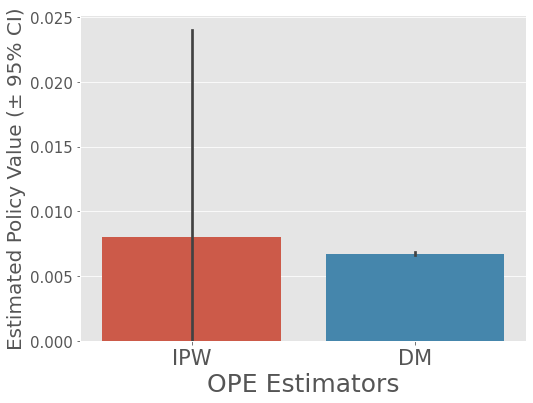

In [75]:
ope.visualize_off_policy_estimates(
    action_dist=lin_ucb_action_dist, 
    estimated_rewards_by_reg_model=estimated_rewards_by_reg_model, 
    n_bootstrap_samples=10000,
    random_state=12345,
)

In [76]:
policy_value_random = OpenBanditDataset.calc_on_policy_policy_value_estimate(
    behavior_policy='random', campaign='all'
)

INFO:obp.dataset.real:When `data_path` is not given, this class downloads the example small-sized version of the Open Bandit Dataset.
/Users/7048518/opt/anaconda3/envs/obp/lib/python3.8/site-packages/obp/dataset/real.py:203: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  item_feature_cat = self.item_context.drop("item_feature_0", 1).apply(
/Users/7048518/opt/anaconda3/envs/obp/lib/python3.8/site-packages/obp/dataset/real.py:206: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  self.action_context = pd.concat([item_feature_cat, item_feature_0], 1).values


In [77]:
relative_ee = ope.summarize_estimators_comparison(
    ground_truth_policy_value=policy_value_random, 
    action_dist = lin_ucb_action_dist, 
    estimated_rewards_by_reg_model=estimated_rewards_by_reg_model,
    metric='relative-ee',
)

In [78]:
relative_ee

,relative-ee
ipw,1.105263
dm,0.769228


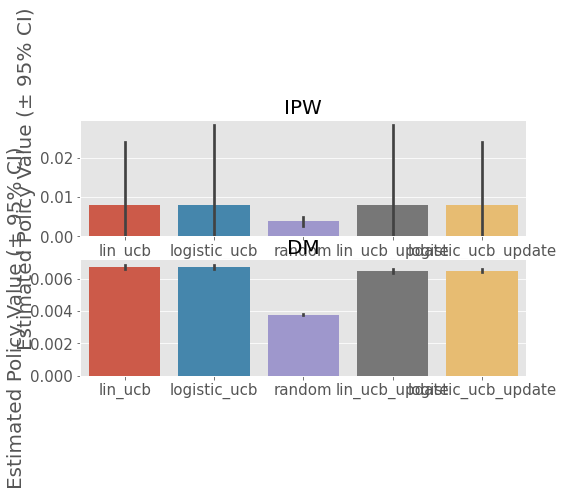

In [79]:
mutiple_comparision = ope.visualize_off_policy_estimates_of_multiple_policies(
    policy_name_list=['lin_ucb', 'logistic_ucb', 'random', 'lin_ucb_update', 'logistic_ucb_update'],
    action_dist_list = [lin_ucb_action_dist, logistic_ucb_action_dist, random_action_dist, lin_ucb_update_action_dist, logistic_ucb_update_action_dist],
    estimated_rewards_by_reg_model=estimated_rewards_by_reg_model,
)